# tsma 5: Clustering comparison
All the examples are done with an implementation of Gross's model of 2022 : https://doi.org/10.1016/j.ecolecon.2010.03.021

This analysis is a homemade one, no articles are associated yet.

### requirements

In [1]:
import os
from tsma.models.gross2022 import Gross2022 as model
from tsma.collect.output_management import get_save_path, query_nparameters, query_simulations

parameters = {
    "b_margin": 0.05,
    "hh_cons_propensity": 1,
    "norisk_interest": 0,
    "tgt_capital_ratio": 0.1,
    "smooth_interest": 15,
    "beta": 1, 
}

hyper_parameters = {"f_n": 200, "hh_n": 20000, "t_end": 100, "seed": 33}

initial_values = {
    "wages_0": 1,
    "wages_1": 1,
    "prices_0": 1.01,
    "prices_1": 1,
}

m = model(parameters, hyper_parameters, initial_values)
output = m.simulate(t_end = 40, seed = 10, save = True, overwrite = False)
varnames = list(output)
nvar = len(varnames)

path_figure = os.sep.join([get_save_path(m, False), "figures"])

## 1 Time series analyses

### Data importation

In [2]:
from tsma.collect.output_management import load_clusters
from tsma.analyses.clustering import get_data_for_clustering

df_params0, outputs0, path_figures = get_data_for_clustering(m, nsim = 40, sim_id0 = 0, step = 2, t_end = 40, csv_name = "temp")


df_clusters = load_clusters(m, name = "temp")
df_clusters.head()

,m1_v1_e1_k3_TsKMeans_c0,m2_v2_e1_k3_KMeans_c0,m2_v2_e1_k3_MiniBatch_KMeans_c0,m2_v2_e1_k3_Gaussian_Mixture_c0,m2_v2_e2_k3_KMeans_c0,m2_v2_e2_k3_MiniBatch_KMeans_c0,m2_v2_e2_k3_Gaussian_Mixture_c0,m1_v1_e1_k4_TsKMeans_c0,m2_v2_e1_k4_KMeans_c0,m2_v2_e1_k4_MiniBatch_KMeans_c0,...,m2_v2_e2_k4_KMeans_c0,m2_v2_e2_k4_MiniBatch_KMeans_c0,m2_v2_e2_k4_Gaussian_Mixture_c0,m1_v1_e1_k5_TsKMeans_c0,m2_v2_e1_k5_KMeans_c0,m2_v2_e1_k5_MiniBatch_KMeans_c0,m2_v2_e1_k5_Gaussian_Mixture_c0,m2_v2_e2_k5_KMeans_c0,m2_v2_e2_k5_MiniBatch_KMeans_c0,m2_v2_e2_k5_Gaussian_Mixture_c0
sim_id,,,,,,,,,,,,,,,,,,,,,
S0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,...,1.0,3.0,0.0,1.0,3.0,4.0,1.0,2.0,2.0,4.0
S4,2.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,...,1.0,3.0,0.0,1.0,3.0,4.0,1.0,2.0,2.0,4.0
S6,2.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,...,1.0,3.0,0.0,1.0,3.0,4.0,1.0,2.0,2.0,4.0
S10,1.0,0.0,2.0,2.0,0.0,1.0,1.0,1.0,3.0,3.0,...,2.0,2.0,2.0,1.0,2.0,3.0,4.0,4.0,3.0,3.0
S12,1.0,0.0,2.0,2.0,0.0,1.0,1.0,1.0,3.0,3.0,...,2.0,2.0,2.0,1.0,2.0,3.0,4.0,4.0,3.0,3.0


### Data processing

**clean_df_params** drops certain parameters and improve the column's names

**get_df_clusters2** give for a given cluster, its id, the clustering approach associated, a labels for plots and the ids of the simulations within the cluster.

In [19]:
from tsma.analyses.clustering import get_df_clusters2, clean_df_params

not_intesting_para = ['p1__norisk_interest', 'p1__smooth_interest','p1__beta',"p2__t_end"]
df_params = clean_df_params(df_params0, not_intesting_para)
df_params.index = df_params["sim_id"]

df_clusters2 = get_df_clusters2(df_clusters)
df_clusters2.head()

,cluster_id,ordercode,label,clust_number,clustering_code,sim_ids
cluster_id,,,,,,
m1_v1_e1_k3_TsKMeans_c0_g0,m1_v1_e1_k3_TsKMeans_c0_g0,m1_TsKMeans_v1_e1_k3_c0_g0,"$Ts_{1,1,1}^{0:3}$",0,m1_v1_e1_k3_TsKMeans_c0,"Index(['S16', 'S18', 'S34', 'S40', 'S58', 'S60..."
m1_v1_e1_k3_TsKMeans_c0_g1,m1_v1_e1_k3_TsKMeans_c0_g1,m1_TsKMeans_v1_e1_k3_c0_g1,"$Ts_{1,1,1}^{1:3}$",1,m1_v1_e1_k3_TsKMeans_c0,"Index(['S0', 'S4', 'S6', 'S22', 'S24', 'S70', ..."
m1_v1_e1_k3_TsKMeans_c0_g2,m1_v1_e1_k3_TsKMeans_c0_g2,m1_TsKMeans_v1_e1_k3_c0_g2,"$Ts_{1,1,1}^{2:3}$",2,m1_v1_e1_k3_TsKMeans_c0,"Index(['S10', 'S12', 'S28', 'S30', 'S36', 'S42..."
m1_v1_e1_k4_TsKMeans_c0_g0,m1_v1_e1_k4_TsKMeans_c0_g0,m1_TsKMeans_v1_e1_k4_c0_g0,"$Ts_{1,1,1}^{0:4}$",0,m1_v1_e1_k4_TsKMeans_c0,"Index(['S10', 'S12', 'S28', 'S30', 'S36', 'S42..."
m1_v1_e1_k4_TsKMeans_c0_g1,m1_v1_e1_k4_TsKMeans_c0_g1,m1_TsKMeans_v1_e1_k4_c0_g1,"$Ts_{1,1,1}^{1:4}$",1,m1_v1_e1_k4_TsKMeans_c0,"Index(['S34', 'S40', 'S58', 'S60', 'S82'], dty..."


Finaly **save_cluster_ts_analyses** can be used to save the following visualizations:
- **onesim** : one simulation per cluster for a given clustering approach
- **ci** : the confidence intervals per cluster for a given clustering approach
- **nsim**: n simulations from a given cluster
- **ci_clust** : the confidence intervals for a given cluster

In [11]:
from tsma.visuals.fig_management import save_cluster_ts_analyses

save_cluster_ts_analyses(
    outputs0,
    varnames,
    path_figures,
    df_clusters2,
    df_params,
    nsim_clust=4,
    onesim=True,
    nsim=True,
    ci=True,
    ci_clust=True,
)

m1_v1_e1_k3_TsKMeans_c0_g0


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m1_v1_e1_k3_TsKMeans_c0_g1


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m1_v1_e1_k3_TsKMeans_c0_g2


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m1_v1_e1_k4_TsKMeans_c0_g0


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m1_v1_e1_k4_TsKMeans_c0_g1


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m1_v1_e1_k4_TsKMeans_c0_g2


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m1_v1_e1_k4_TsKMeans_c0_g3


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m1_v1_e1_k5_TsKMeans_c0_g0


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m1_v1_e1_k5_TsKMeans_c0_g1


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m1_v1_e1_k5_TsKMeans_c0_g2


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m1_v1_e1_k5_TsKMeans_c0_g3


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m1_v1_e1_k5_TsKMeans_c0_g4


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e1_k3_Gaussian_Mixture_c0_g0


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e1_k3_Gaussian_Mixture_c0_g1


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e1_k3_Gaussian_Mixture_c0_g2


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e1_k4_Gaussian_Mixture_c0_g0


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e1_k4_Gaussian_Mixture_c0_g1


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e1_k4_Gaussian_Mixture_c0_g2


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e1_k4_Gaussian_Mixture_c0_g3


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e1_k5_Gaussian_Mixture_c0_g0


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e1_k5_Gaussian_Mixture_c0_g1


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e1_k5_Gaussian_Mixture_c0_g2


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e1_k5_Gaussian_Mixture_c0_g3


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e1_k5_Gaussian_Mixture_c0_g4


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e2_k3_Gaussian_Mixture_c0_g0


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e2_k3_Gaussian_Mixture_c0_g1


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e2_k3_Gaussian_Mixture_c0_g2


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e2_k4_Gaussian_Mixture_c0_g0


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e2_k4_Gaussian_Mixture_c0_g1


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e2_k4_Gaussian_Mixture_c0_g2


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e2_k4_Gaussian_Mixture_c0_g3


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e2_k5_Gaussian_Mixture_c0_g0


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e2_k5_Gaussian_Mixture_c0_g1


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e2_k5_Gaussian_Mixture_c0_g2


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e2_k5_Gaussian_Mixture_c0_g3


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e2_k5_Gaussian_Mixture_c0_g4


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e1_k3_KMeans_c0_g0


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e1_k3_KMeans_c0_g1


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e1_k3_KMeans_c0_g2


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e1_k4_KMeans_c0_g0


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e1_k4_KMeans_c0_g1


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e1_k4_KMeans_c0_g2


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e1_k4_KMeans_c0_g3


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e1_k5_KMeans_c0_g0


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e1_k5_KMeans_c0_g1


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e1_k5_KMeans_c0_g2


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e1_k5_KMeans_c0_g3


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e1_k5_KMeans_c0_g4


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e2_k3_KMeans_c0_g0


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e2_k3_KMeans_c0_g1


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e2_k3_KMeans_c0_g2


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract



m2_v2_e2_k4_KMeans_c0_g0


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e2_k4_KMeans_c0_g1


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e2_k4_KMeans_c0_g2


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e2_k4_KMeans_c0_g3


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e2_k5_KMeans_c0_g0


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e2_k5_KMeans_c0_g1


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e2_k5_KMeans_c0_g2


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e2_k5_KMeans_c0_g3


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e2_k5_KMeans_c0_g4


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e1_k3_MiniBatch_KMeans_c0_g0


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e1_k3_MiniBatch_KMeans_c0_g1


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e1_k3_MiniBatch_KMeans_c0_g2


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e1_k4_MiniBatch_KMeans_c0_g0


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e1_k4_MiniBatch_KMeans_c0_g1


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e1_k4_MiniBatch_KMeans_c0_g2


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e1_k4_MiniBatch_KMeans_c0_g3


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e1_k5_MiniBatch_KMeans_c0_g0


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e1_k5_MiniBatch_KMeans_c0_g1


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e1_k5_MiniBatch_KMeans_c0_g2


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e1_k5_MiniBatch_KMeans_c0_g3


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e1_k5_MiniBatch_KMeans_c0_g4


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e2_k3_MiniBatch_KMeans_c0_g0


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e2_k3_MiniBatch_KMeans_c0_g1


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e2_k3_MiniBatch_KMeans_c0_g2


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e2_k4_MiniBatch_KMeans_c0_g0


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e2_k4_MiniBatch_KMeans_c0_g1


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e2_k4_MiniBatch_KMeans_c0_g2


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e2_k4_MiniBatch_KMeans_c0_g3


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e2_k5_MiniBatch_KMeans_c0_g0


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e2_k5_MiniBatch_KMeans_c0_g1


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e2_k5_MiniBatch_KMeans_c0_g2


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e2_k5_MiniBatch_KMeans_c0_g3


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.



m2_v2_e2_k5_MiniBatch_KMeans_c0_g4


C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:37: RuntimeWarning:

Mean of empty slice

C:\Users\samud\Bureau\Python code\Repo\tsma\analyses\statistics.py:38: RuntimeWarning:

Degrees of freedom <= 0 for slice.

C:\Users\samud\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning:

invalid value encountered in subtract



## 2 clusters network

### Jaccard coefficient computation

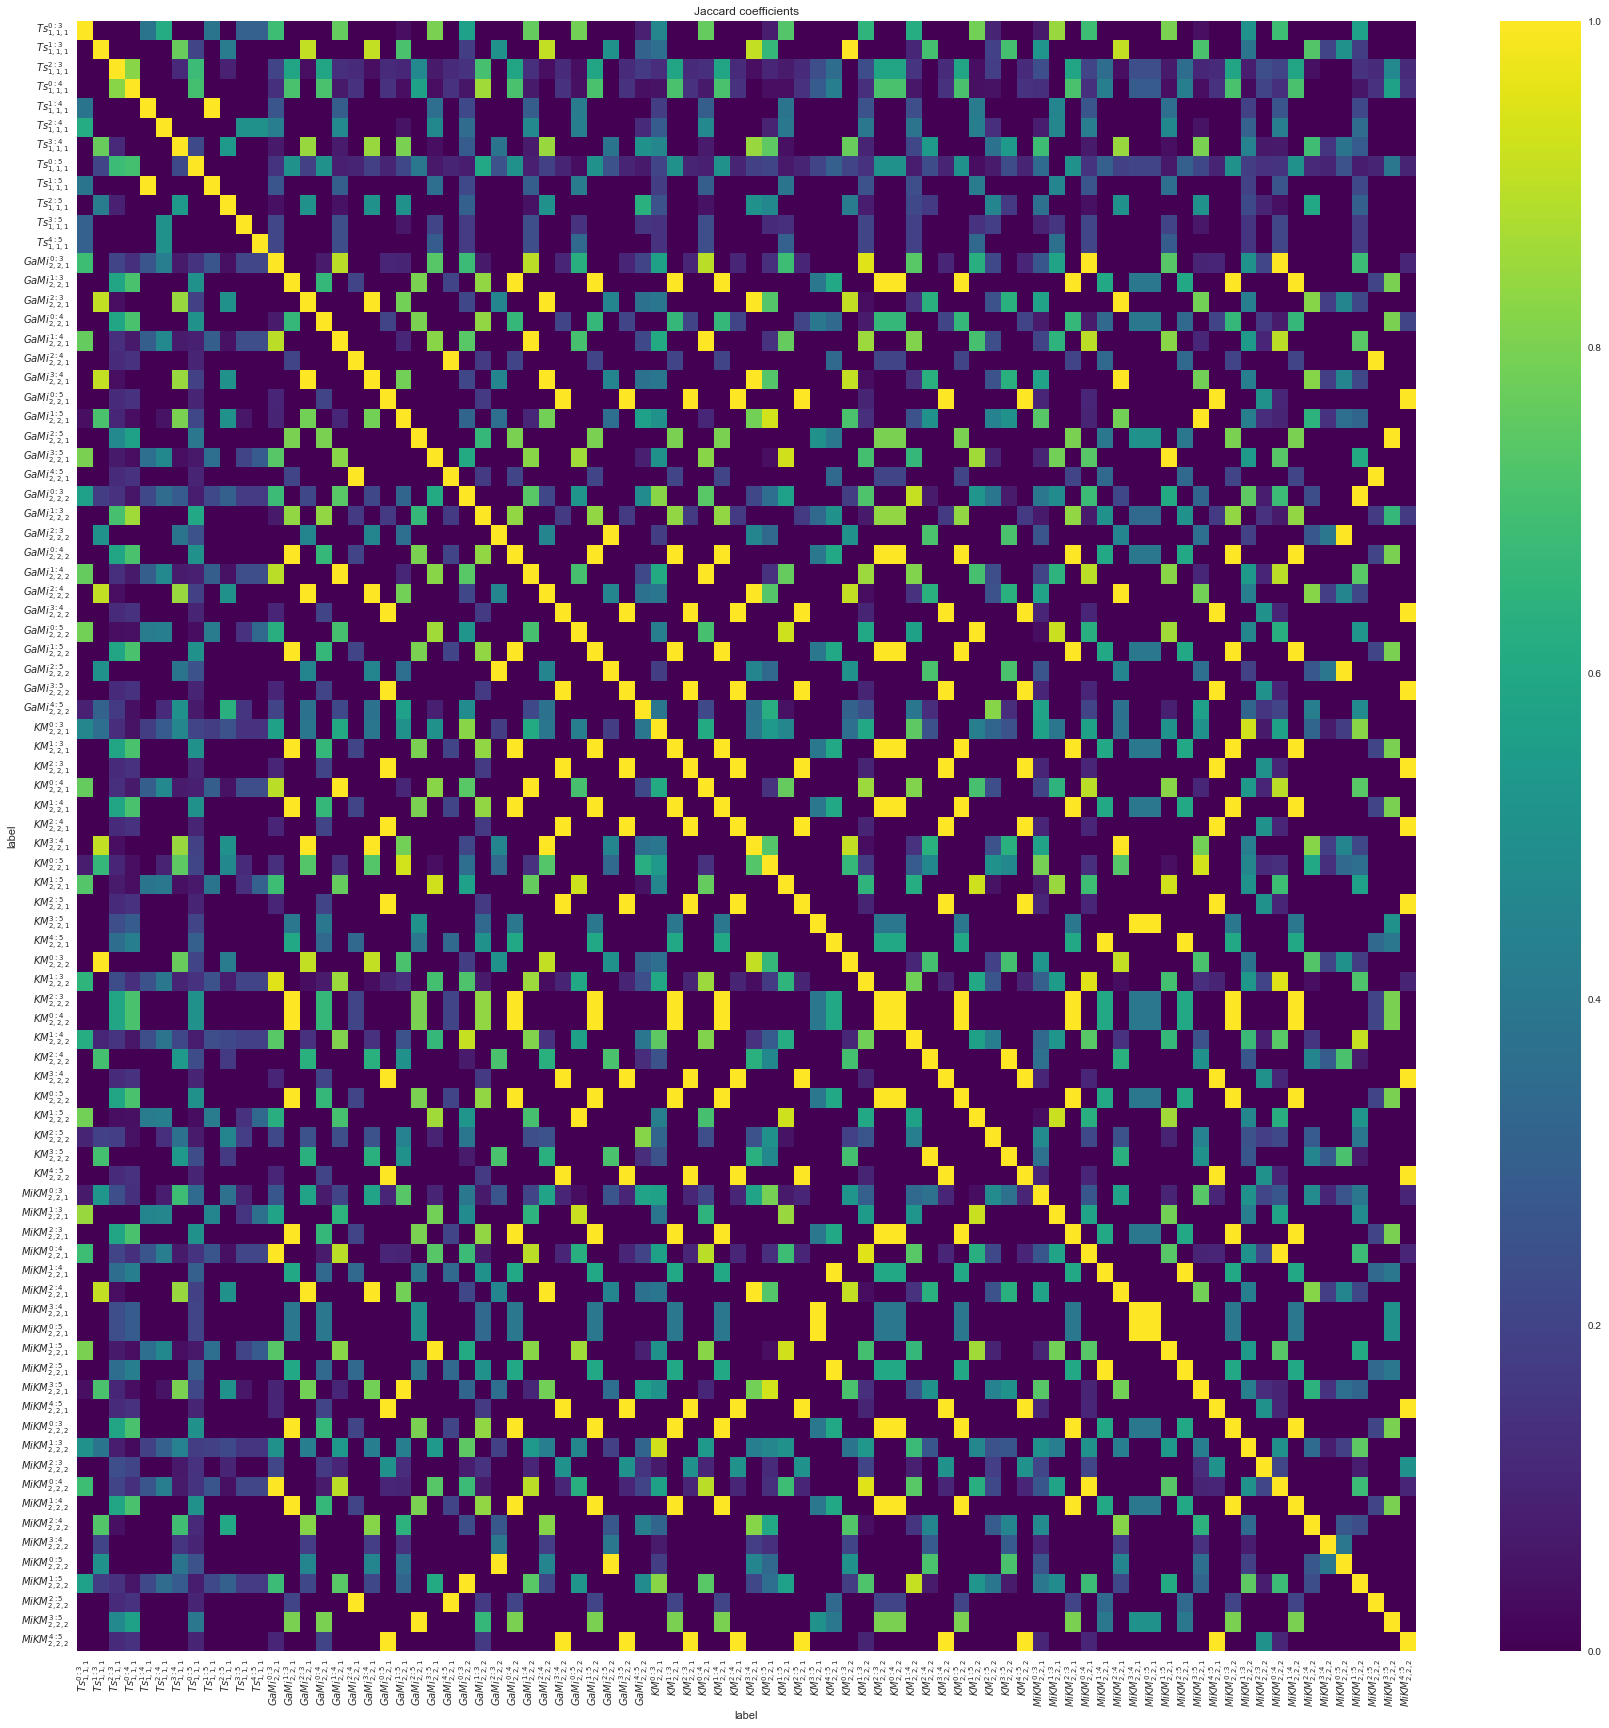

In [20]:
from tsma.analyses.clustering import get_jaccard_dfs

df_jaccard, df_jaccdist = get_jaccard_dfs(df_clusters2, size = 30, heatmap = True)

**Temporary savings**

In [21]:
from collect.output_management import save_jaccard
save_jaccard(m, df_jaccard, df_jaccdist, name = "temp")

In [2]:
from collect.output_management import load_jaccard
df_jaccard, df_jaccdist = load_jaccard(m, name = "temp")

### Dendrograms

Save dendrograms for hierarchical clustering.

In [6]:
from tsma.visuals.fig_management import save_cluster_dendrogram
save_cluster_dendrogram(df_clusters2, df_jaccdist, path_figure, threshold = 0.8)

NameError: name 'df_clusters2' is not defined

### Clusters network visualizations

The jaccard matrix is first converted into a network

In [3]:
from tsma.analyses.clustering import jacc_net
net = jacc_net(df_jaccard)

Then nodes style for plotting is built based on labels information.

In [4]:
from tsma.analyses.clustering import get_df_labels
df_labels = get_df_labels(net)
df_labels.head()

,algo,m,v,e,k
"$Ts_{1,1,1}^{0:3}$",Ts,1,1,1,3
"$Ts_{1,1,1}^{1:3}$",Ts,1,1,1,3
"$Ts_{1,1,1}^{2:3}$",Ts,1,1,1,3
"$Ts_{1,1,1}^{0:4}$",Ts,1,1,1,4
"$Ts_{1,1,1}^{1:4}$",Ts,1,1,1,4


In [5]:
from tsma.analyses.clustering import add_nodes_styles
df_labels2 = add_nodes_styles(df_labels)
df_labels2.head()

,algo,m,v,e,k,label,node_color,edgecolors,node_shape
label,,,,,,,,,
"$Ts_{1,1,1}^{0:3}$",Ts,1,1,1,3,"$Ts_{1,1,1}^{0:3}$",#f46d43,#721f81,s
"$Ts_{1,1,1}^{1:3}$",Ts,1,1,1,3,"$Ts_{1,1,1}^{1:3}$",#f46d43,#721f81,s
"$Ts_{1,1,1}^{2:3}$",Ts,1,1,1,3,"$Ts_{1,1,1}^{2:3}$",#f46d43,#721f81,s
"$Ts_{1,1,1}^{0:4}$",Ts,1,1,1,4,"$Ts_{1,1,1}^{0:4}$",#f46d43,#721f81,s
"$Ts_{1,1,1}^{1:4}$",Ts,1,1,1,4,"$Ts_{1,1,1}^{1:4}$",#f46d43,#721f81,s


Finally the graph can be visualized with different thresholds on Jaccard coefficient to consider a connection between two clusters.
Here are the visualizations currently implemented:
- **save_kamada_kawai**: Kamada Kawai algorithm
- **save_spring**: 'anti-gravity force'
- **save_spectral**: unnormalized Laplacian
- **save_shell**
- **save_circular**

In [ ]:
from tsma.visuals.fig_management import save_kamada_kawai, save_spring

save_kamada_kawai(
    net, df_labels2, path_figure, thresholds=[0.1, 0.6, 0.9]
)

save_spring(
    net, df_labels2, path_figure, thresholds=[0.1, 0.6, 0.9]
)

save_shell(
    net, df_labels2, path_figure, thresholds=[0.1, 0.6, 0.9]
)